In [3]:
# 1. Importando o dataset Localmente
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

# Get the CSV file path
# Assuming the CSV file is named "Sleep_health_and_lifestyle_dataset.csv"
# and it's located in the downloaded dataset directory.
file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")


100%|██████████| 2.54k/2.54k [00:00<00:00, 4.42MB/s]

Extracting files...


In [36]:
# 2. transformando o dataset importando  em um dataframe
import pandas as pd

data = pd.read_csv(file_path)  # Use the file path here

display(data.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [37]:
# 3 - Remover Colunas desnecessárias
try:
  data.drop(columns=['Person ID'], inplace=True)
except(Exception):
    pass
# 4 - Dividir a Coluna Blood Pressure em duas colunas.

try:
  data[["Systolic BP","Diastolic BP"]] = data['Blood Pressure'].str.split("/", expand=True)
  data.drop(columns=['Blood Pressure'], inplace=True)
except(Exception):
    pass

# Converter os valores para numérico
data['Systolic BP'] = pd.to_numeric(data['Systolic BP'])
data['Diastolic BP'] = pd.to_numeric(data['Diastolic BP'])


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [38]:
#checando informações do dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           155 non-null    object 
 11  Systolic BP              374 non-null    int64  
 12  Diastolic BP             374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


# Pré-Processamento



In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
oneHot_encoder = OneHotEncoder()
#🔥

# 1 - Transformar todos os atributos para numérico

# a - Gender -> Label
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# b - Occupation -> One Hot Encode
try:
  data['Occupation'] = data['Occupation'].astype(str)  # Garantir que seja tratada como string
  encoded = pd.get_dummies(data['Occupation'], prefix='Occupation', drop_first=True)
  data = data.drop(columns=['Occupation']).join(encoded)
except(KeyError):
  pass

# c - BMI Category -> Label
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])

# d- Blood Pressure -> One Hot Encode
''' try:
  data['Blood Pressure'] = data['Blood Pressure'].astype(str)  # Garantir que seja tratada como string
  encoded = pd.get_dummies(data['Blood Pressure'], prefix='Blood Pressure', drop_first=True)
  data = data.drop(columns=['Blood Pressure']).join(encoded)
except(KeyError):
  pass '''

# e - Sleep Disorder -> Label
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

data.info()
display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           374 non-null    int64  
 1   Age                              374 non-null    int64  
 2   Sleep Duration                   374 non-null    float64
 3   Quality of Sleep                 374 non-null    int64  
 4   Physical Activity Level          374 non-null    int64  
 5   Stress Level                     374 non-null    int64  
 6   BMI Category                     374 non-null    int64  
 7   Heart Rate                       374 non-null    int64  
 8   Daily Steps                      374 non-null    int64  
 9   Sleep Disorder                   374 non-null    int64  
 10  Systolic BP                      374 non-null    int64  
 11  Diastolic BP                     374 non-null    int64  
 12  Occupation_Doctor     

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,27,6.1,6,42,6,3,77,4200,2,...,False,False,False,False,False,False,False,False,True,False
1,1,28,6.2,6,60,8,0,75,10000,2,...,True,False,False,False,False,False,False,False,False,False
2,1,28,6.2,6,60,8,0,75,10000,2,...,True,False,False,False,False,False,False,False,False,False
3,1,28,5.9,4,30,8,2,85,3000,1,...,False,False,False,False,False,True,False,False,False,False
4,1,28,5.9,4,30,8,2,85,3000,1,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,9,75,3,3,68,7000,1,...,False,False,False,False,True,False,False,False,False,False
370,0,59,8.0,9,75,3,3,68,7000,1,...,False,False,False,False,True,False,False,False,False,False
371,0,59,8.1,9,75,3,3,68,7000,1,...,False,False,False,False,True,False,False,False,False,False
372,0,59,8.1,9,75,3,3,68,7000,1,...,False,False,False,False,True,False,False,False,False,False


In [132]:
# 2 - Transformar os labels em numérico
# Check basic data summary for numeric variables

# Deixarei como uma variável, caso seja preciso mudar, algum dia
target_col ="Gender"
data[target_col] = label_encoder.fit_transform(data[target_col])

print(f" a coluna target {target_col}, está transformarda em valores numérios: {data[target_col].dtype}")

 a coluna target Gender, está transformarda em valores numérios: int64


In [133]:
# 3 - Normalizar os atributos na escala 0..1
from sklearn.preprocessing import MinMaxScaler

# Min- Max
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
#data_normalized.drop(columns=[target_col], inplace=True)

#display(data_normalized)

display(data_normalized.describe().T)

,count,mean,std,min,25%,50%,75%,max
Gender,374.0,0.505348,0.500641,0.0,0.000000,1.000000,1.000000,1.0
Age,374.0,0.474515,0.271035,0.0,0.257812,0.500000,0.718750,1.0
Sleep Duration,374.0,0.493365,0.294688,0.0,0.222222,0.518519,0.740741,1.0
Quality of Sleep,374.0,0.662567,0.239391,0.0,0.400000,0.600000,0.800000,1.0
Physical Activity Level,374.0,0.486185,0.347180,0.0,0.250000,0.500000,0.750000,1.0
Stress Level,374.0,0.477005,0.354905,0.0,0.200000,0.400000,0.800000,1.0
BMI Category,374.0,0.432264,0.477075,0.0,0.000000,0.000000,1.000000,1.0
Heart Rate,374.0,0.219400,0.190550,0.0,0.111111,0.222222,0.277778,1.0
Daily Steps,374.0,0.545264,0.231131,0.0,0.371429,0.571429,0.714286,1.0
Sleep Disorder,374.0,0.689840,0.402810,0.0,0.500000,1.000000,1.000000,1.0


# Construção dos Algoritmos

- Árvore de Decisão (gini e entropy)
- kNN (k igual a 5 e 10)
-MLP (escolher duas arquiteturas diferentes e variar o parâmetro activation =
{‘relu’,’tanh’}). “relu” é o valor default para o parâmetro activation
- K-Means (K igual ao número de classes existente no problema)

In [134]:
# Importando os modelos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

#Método para medir a acurácia
def acc_show(model, name:str, X_test, y_test):
  '''
  Método criado para agilizar quando estiver medindo a acurácia, pode não parecer, mas essas duas linhas são chatinhas de se fazer repetidamente.
  '''
  acc = model.score(X_test, y_test)
  print(f" Acurácia do modelo {name}: ", round(acc , 2 )*100,"%")
  return acc

# target_col será  o nosso target
y = data[target_col]

# O resto é resto
X = data_normalized.drop(target_col, axis=1)

# Separando o conjunto de dados em treinamento e teste usando "train_test_split"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=None)


In [135]:
# 1) Árvores de Decisão

# a.  Gini
gini_tree = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=None)
gini_tree.fit(X_train, y_train)

acc_show(gini_tree, "Árvore de Decisão (gini)", X_test, y_test)

# b.  Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=None)
entropy_tree.fit(X_train, y_train)

acc_show(entropy_tree, "Árvore de Decisão (Entropia)", X_test, y_test)

 Acurácia do modelo Árvore de Decisão (gini):  96.0 %
 Acurácia do modelo Árvore de Decisão (Entropia):  95.0 %


0.9469026548672567

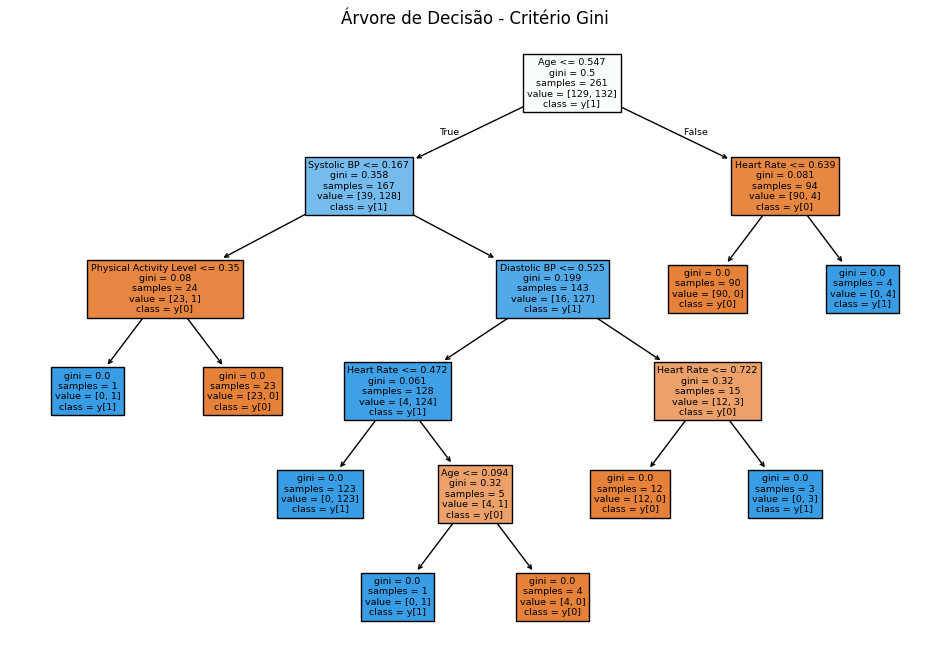

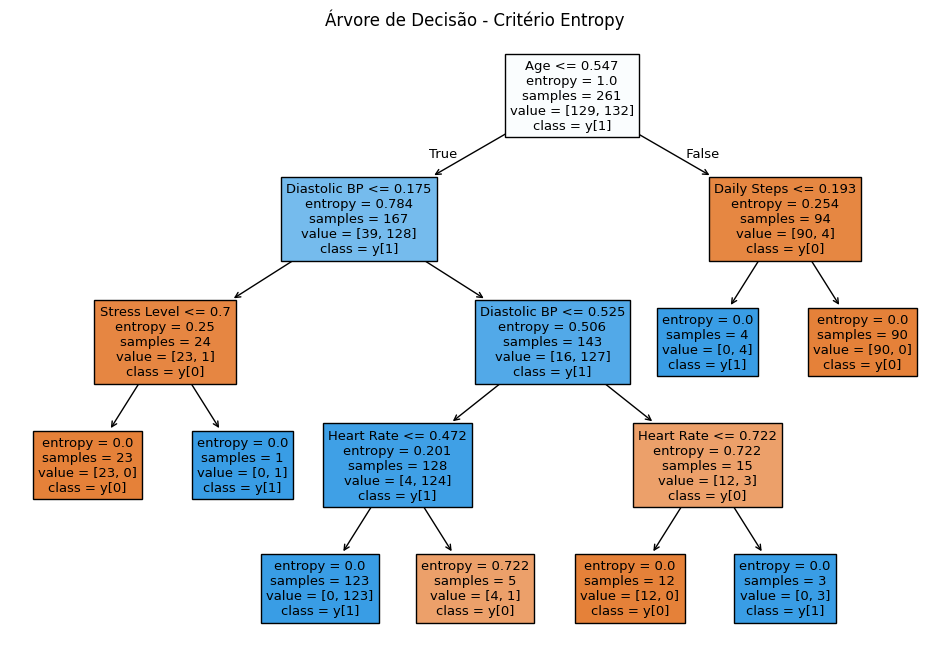

In [136]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Exibir a árvore de decisão com critério Gini
plt.figure(figsize=(12, 8))
plot_tree(gini_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Árvore de Decisão - Critério Gini")
plt.show()

# Exibir a árvore de decisão com critério Entropy
plt.figure(figsize=(12, 8))
plot_tree(entropy_tree, filled=True, feature_names=X_train.columns, class_names=True)
plt.title("Árvore de Decisão - Critério Entropy")
plt.show()

In [137]:
# 2 -  KNN (k igual a 5 e 10)

k_vizinhos_5=5
k_vizinhos_10=10

# a. Treinar KNN com 5 vizinhos
knn_5_neighbors = KNeighborsClassifier(n_neighbors=k_vizinhos_5)
knn_5_neighbors.fit(X_train, y_train)

acc_knn_5_vizinhos = acc_show(knn_5_neighbors, f"KNN com {k_vizinhos_5} vizinhos", X_test, y_test)

# b. Treinar KNN com 10 vizinhos
knn_10_neighbors = KNeighborsClassifier(n_neighbors=k_vizinhos_10)
knn_10_neighbors.fit(X_train, y_train)

acc_knn__vizinhos = acc_show(knn_5_neighbors, f"KNN com {k_vizinhos_10} vizinhos", X_test, y_test)


 Acurácia do modelo KNN com 5 vizinhos:  94.0 %
 Acurácia do modelo KNN com 10 vizinhos:  94.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


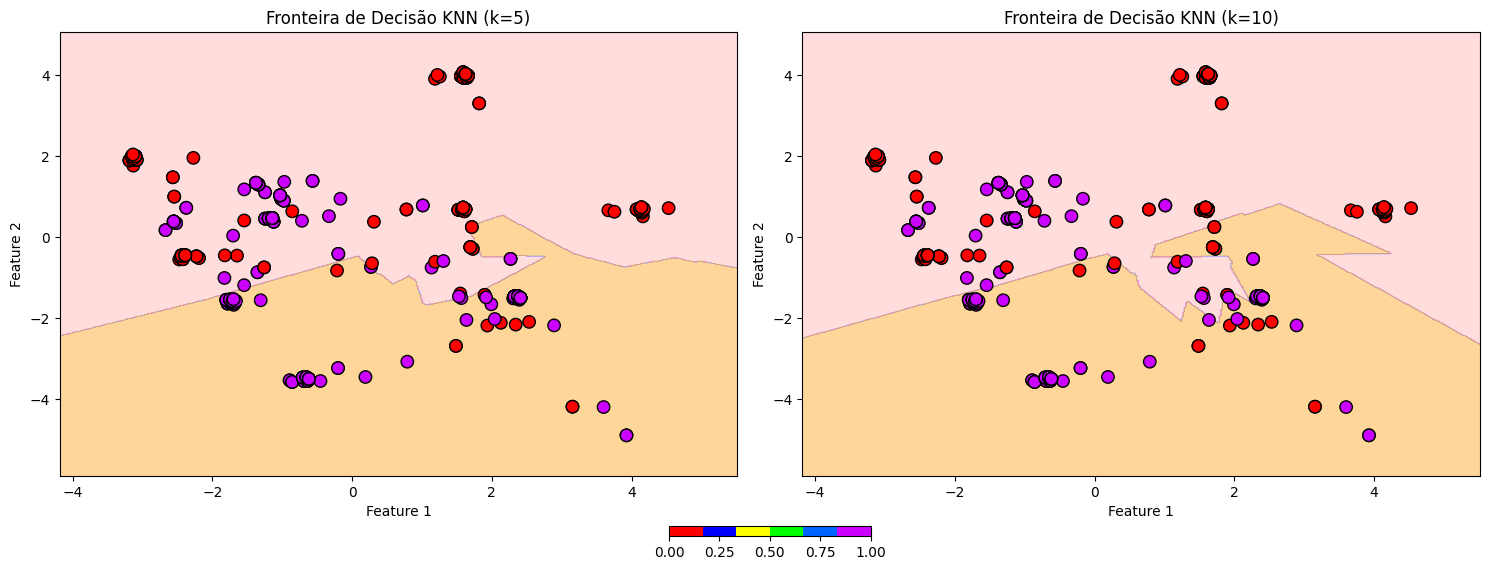

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Dados fictícios (substitua pelo seu conjunto de dados)
# X, y = seus dados aqui

def plot_decision_boundary(X, y, clf, k_value, ax):
    '''Função para plotar a fronteira de decisão do modelo KNN'''

    # Ajusta o escalonamento
    X_scaled = StandardScaler().fit_transform(X)

    # Reduz as dimensões para 2 com PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Definir o intervalo da grade
    h = .02  # passo na grade
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Previsões de cada ponto da grade
    Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plota a fronteira de decisão
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#FFFF66', '#FF66FF', '#66CCFF', '#FF9900']))

    # Plota os pontos de dados
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF', '#FFFF00', '#00FF00', '#0066FF', '#CC00FF']), edgecolors='k', s=80)

    # Rótulos e título
    ax.set_title(f'Fronteira de Decisão KNN (k={k_value})', fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    return scatter

# Definindo os valores de k
k_values = [5, 10]

# Criando a figura e os eixos para plotar as fronteiras de decisão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Iterar sobre os valores de K para treinar e plotar as fronteiras de decisão
for k in k_values:
    # Treina o classificador KNN para cada valor de k
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plota a fronteira de decisão
    scatter = plot_decision_boundary(X, y, clf, k, axes[k_values.index(k)])

# Exibir a legenda e o gráfico
fig.tight_layout()
fig.colorbar(scatter, ax=axes, orientation="horizontal", fraction=0.02, pad=0.1)
plt.show()
